   Descriptive statistics of natural phenomena such as usually presented in data science rarely figure out the global and intricate behavior of variables described within the available datasets. No complete understanding of the real world is possible without considering phenomena as a whole system, allowing to explain how correlation metrics fail to detect highly dependant values subsets in pairs of (apparently) independant variables. As a result, **network science** was defined as "the study of network representations of physical, biological, and social phenomena leading to predictive models of these phenomena", by the United States Research Council (2006). Deep neural networks might be considered as a premise of the generalization of network science for future applications in analytics and artificial intelligence. 

By this notebook, the author mostly wished to share some results for helping medical teams and players to prevent future injuries from special situations/scenarios. The most critical situations were identified thanks to private models of probabilistic causal networks, which must remain partially disclosed (author developping and publishing private research works in network science, since 2009). 

This work is shared in the memory of Freddie Joe Steinmark (1949-1971).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Any results you write to the current directory are saved as output.

In [ ]:
InjuryRecord = pd.read_csv("../input/nfl-playing-surface-analytics/InjuryRecord.csv")
PlayList = pd.read_csv("../input/nfl-playing-surface-analytics/PlayList.csv")
PlayerTrackData = pd.read_csv("../input/nfl-playing-surface-analytics/PlayerTrackData.csv")


Cleaning stadium description

In [ ]:
PlayList['StadiumType'].unique()

In [ ]:
exp2replace = ['Domed']
PlayList['StadiumType'] = PlayList['StadiumType'].replace(exp2replace, 'Dome')

exp2replace = ['Dome, closed', 'Domed, closed']
PlayList['StadiumType'] = PlayList['StadiumType'].replace(exp2replace, 'Closed Dome')

exp2replace = ['Cloudy']
PlayList['StadiumType'] = PlayList['StadiumType'].replace(exp2replace, '')

exp2replace = ['Indoors', 'Retractable Roof']
PlayList['StadiumType'] = PlayList['StadiumType'].replace(exp2replace, 'Indoor')

exp2replace = ['Oudoor','Ourdoor','Outddors', 'Outdoors','Outdor','Outside']
PlayList['StadiumType'] = PlayList['StadiumType'].replace(exp2replace, 'Outdoor')

exp2replace = ['Retr. Roof Closed','Retr. Roof-Closed', 'Indoor, Roof Closed']
PlayList['StadiumType'] = PlayList['StadiumType'].replace(exp2replace, 'Retr. Roof - Closed')

exp2replace = ['Retr. Roof-Open', 'Outdoor Retr Roof-Open', 'Indoor, Open Roof', 'Domed, Open', 'Domed, open', 'Open']
PlayList['StadiumType'] = PlayList['StadiumType'].replace(exp2replace, 'Retr. Roof - Open')

PlayList['StadiumType'].unique()

Cleaning weather description

In [ ]:
PlayList['Weather'].unique()

In [ ]:
exp2replace = ['Indoor','Indoors']
PlayList['Weather'] = PlayList['Weather'].replace(exp2replace, )

exp2replace = ['Clear skies','Clear Skies']
PlayList['Weather'] = PlayList['Weather'].replace(exp2replace, 'Clear')

exp2replace = ['Overcast','Coudy', 'Clouidy', 'cloudy', 'Mostly Coudy', 'Mostly cloudy']
PlayList['Weather'] = PlayList['Weather'].replace(exp2replace, 'Cloudy')

exp2replace = ['Party']
PlayList['Weather'] = PlayList['Weather'].replace(exp2replace, 'Partly')

exp2replace = ['Partly clear','Partly Sunny', 'Party cloudy', 'Partly Clouidy', 'Partly cloudy']
PlayList['Weather'] = PlayList['Weather'].replace(exp2replace, 'Partly Cloudy')

exp2replace = ['Rain']
PlayList['Weather'] = PlayList['Weather'].replace(exp2replace, 'Rainy')

exp2replace = ['Clear and sunny', 'Sunny and clear', 'Sunny Skies']
PlayList['Weather'] = PlayList['Weather'].replace(exp2replace, 'Sunny')

exp2replace = ['Mostly Sunny Skies']
PlayList['Weather'] = PlayList['Weather'].replace(exp2replace, 'Mostly Sunny')

PlayList['Weather'].unique()


Cleaning position/position group descriptions

In [ ]:
PlayList['Position'].unique()

exp2replace = ['Missing Data']
PlayList['Position'] = PlayList['Position'].replace(exp2replace, )
PlayList['PositionGroup'] = PlayList['PositionGroup'].replace(exp2replace, )

PlayList['PositionGroup'].unique()


Input data are exported for external operations with specific software environment (undisclosed environment).


In [ ]:
import os
PlayList.to_csv('CleanPlaylist.csv')
#InjuryRecord.to_csv('InjuryRecord.csv')
#PlayerTrackData.to_csv('PlayerTrackData.csv')
files = os.listdir(os.curdir)
print (files)


Network science results are imported from external environment

In [ ]:
import pandas as pd
edgedmaxspan = pd.read_csv("../input/nflnet/edgedmaxspan.csv")
#edgednfl = pd.read_csv("../input//nflnet/edgednfl.csv")
#edgednfull = pd.read_csv("../input/nflnet/edgednfull.csv")
#nodesmaxspan = pd.read_csv("../input/nflnet/nodesmaxspan.csv")
#nodesnfl = pd.read_csv("../input/nflnet/nodesnfl.csv")
#nodesnfull = pd.read_csv("../input/nflnet/nodesnfull.csv")

Deploying statistic analysis on the Injury records file generates false **understanding of the *injury risk*** while *statistical bias* are not avoided: 

For instance, if 1 injury on synthetic surface and 1 injury on natural suface were recorded (50/50) while 10 games were recorded on synthetic soil and 100 games on natural soil, the real *injury risk* is not 50% for each surface but 1/10 = 10% for synthetic and only 1/100 = 1% for natural (unbiased/true injury probability). 

 All injury risk values presented in the **imported results are unbiased** based on the whole Playlist and InjuryRecord files, in order not to mislead users with biased data visualizations.


In [ ]:
edgedmaxspan.head()

Injuries being absent in Playlist records, injury risk is something like *risk = injury / (injury + play)* * 100. 

NDLA. The computed metrics ensure homogeneous risk estimations from heterogeneous inputs. 

Three different models of Probabilistic Causal Networks (PCN) providing **injury risk interpolations** were computed based on 120 combinations (pairs) from 16 representative variables (facts) in the original dataset.  

In [ ]:
interpolated_variables = edgedmaxspan[['edget']].groupby('edget').count()
interpolated_variables

A first and trivial network structure *NetFL#1* enables to visualize the significant features for injury causal analysis at a glance.

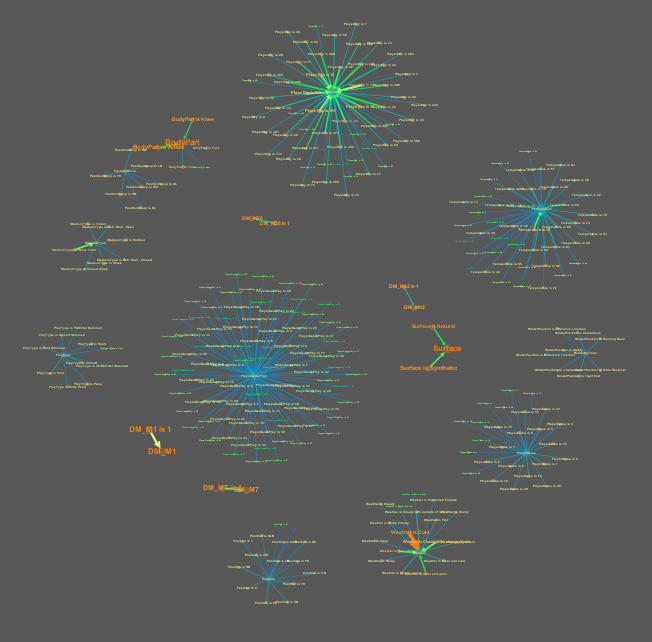
Fig. 1 - NetFL#1

The size and color of elements enable to quickly locate interpolated injury risk in network visualizations: **blue and litte for lowest risk**, **red and large for highest risk** (color gradient above)  

Due to certain lacks in network visualization with packages such as **networkX** or **Igraph**, the ilustrated results were generated from the graph visualizarion platform Gephi (https://gephi.org). Users can download the *nfl3.gephi* file provided with this kernel in "input/NFLnet/", for demos and data exploration from the open source platform.

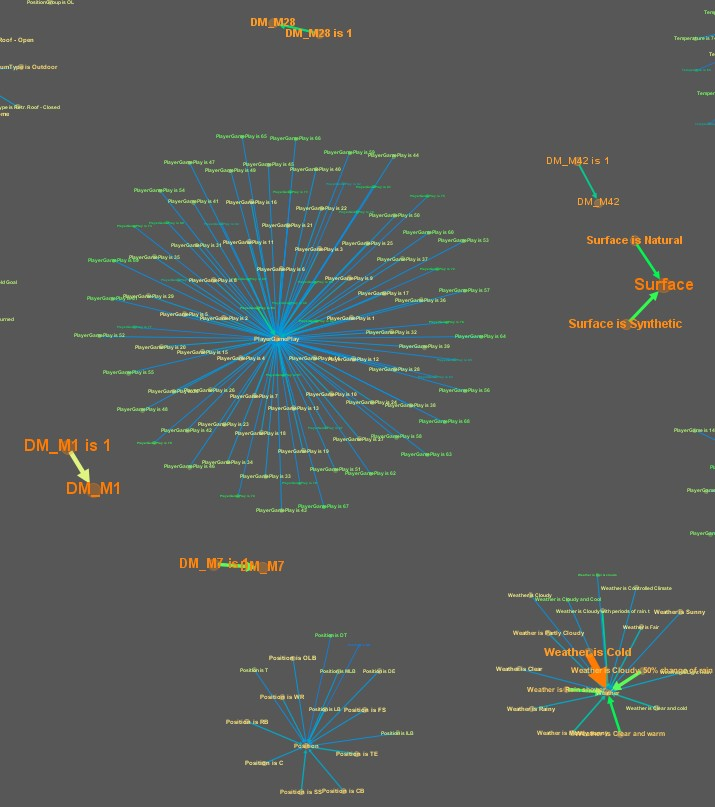
Fig. 2 - Zoom into NetFL#1

A zoom into NetFL#1 makes appear **Cold Weather** as a major cause of injury.
*Surface* also appears as a significant cause, especially when it is *Synthetic* although the injury risk is also medium on *Natural* surfaces. 

One might notice the slight decrease in risks from *DM_M*1 (1 day missed due to injury) to *DM-M7* (7 days missed) then to *DM_M28* and *DM_M42*, that will appear as a **causal chain** in some of the next presented graph structures.

At the opposite, *PlayerGamePlay* appears to have a few consequences on injuries (blue star-network at the center of Fig. 2). 


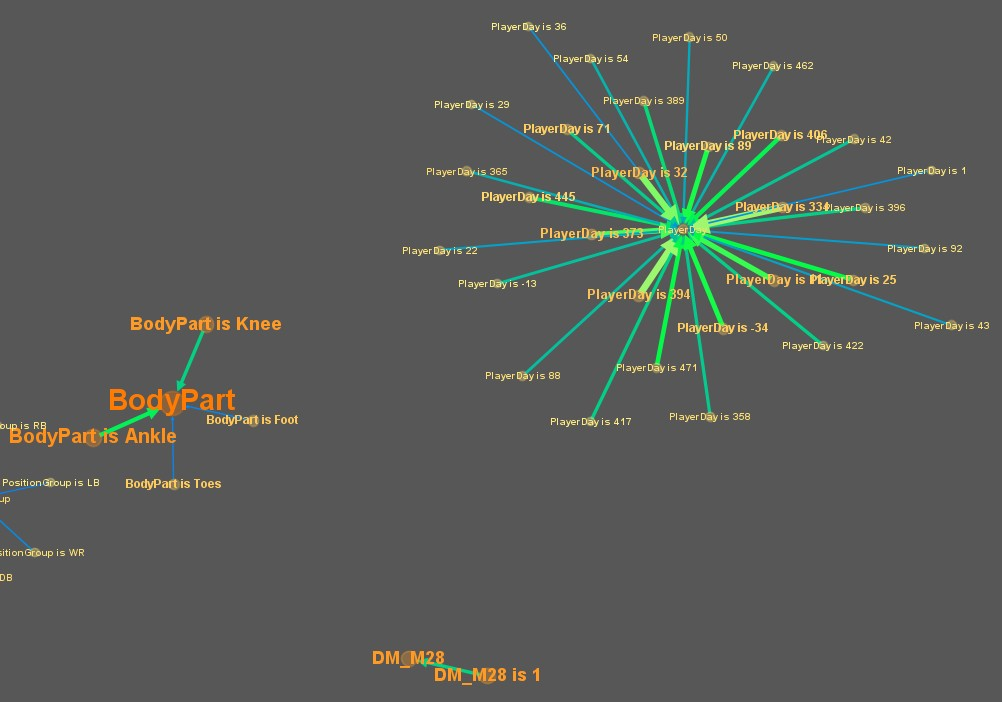
Fig. 3 - Close-up into NetFL#1

A close-up onto the upper left part of NetFL#1 makes appear *Ankle* and *Knee* as major injuries "causes" as *body parts* (Fig.3).

*PlayerDay* seems to have an influence on injuries (green/yellow and mid-sized elements), especially when the number of day is *higher than 300*.

However, *32* days also appear as a risky *PlayerDay* value. Medical teams might study more thoroughly this case which may be due to undersampling in data for this value (*e.g.*, multiple injuries during the same play or date during the season and/or few values recorded in *PlayList* at the same time).

The following PCN - *NetFL#*2 - provides an overview of the **main causal chains** observed in injuries.

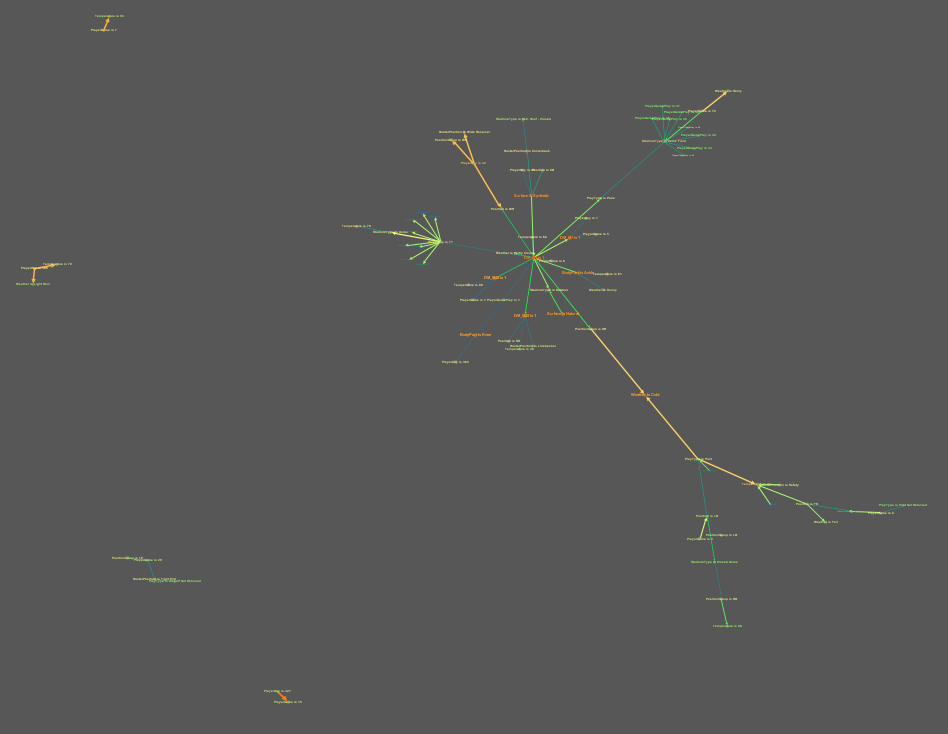
Fig. 4 - NetFL#2

Fig. 4 was obtained applying a Maximum Spanning Tree algorithm to *NetFL#2*, then a Yifan Hu spatialization (see Gephi documentation for implemented versions and publications). 
The result might look as a children drawing of a man/player but it is a pure coincidence (not an author action, nor a sign from an articial intelligence !).

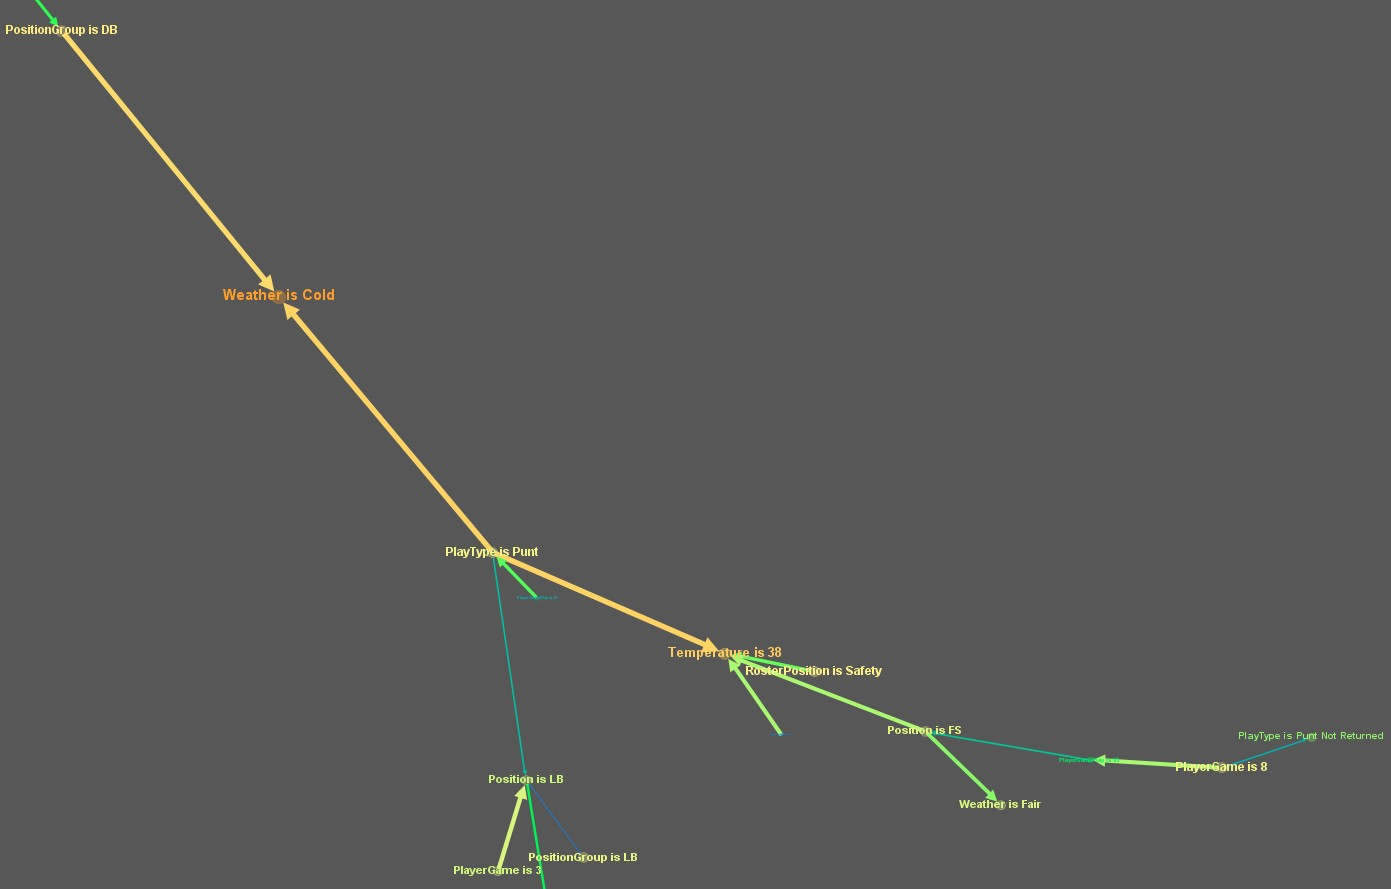
Fig. 5 - Causal chain of injuries risk

The body of *NetFl#2* shows a central chain of causality regarding the risk of injury. 

A high injury risk scenario and recommandation might be deduced: *PositionGroup DB* linked with *PlayType Punt* when *Weather is Cold* (*Temperaure is 38*) **must be avoided**, based on the recorded events (orange edges and nodes in Fig. 5). 

One might notice the apparition of *PlayType is Punt Not Returned* and *Roster Position is Safety* in the "left foot of the man".

Such a **variables and values conjunction** was initially hidden within the dataset then revealed thanks to larger scale interpolations (about 14 000 pairs of variables/values interpolated).


**Ankle injuries** appear tied with *Sunny* weather and medium *temperature* (61°), while **Knee injuries** are tied to the game beginning advanced in the league season - *PlayerGamePlay is 1* and *PlayerDay is 365* (Fig. 6).

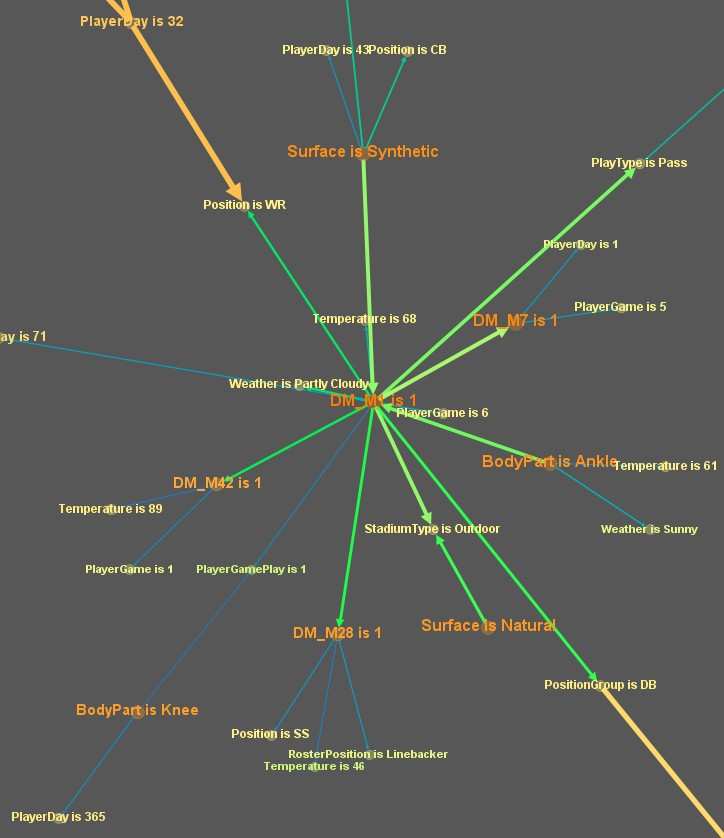
Fig. 6 - Details of the "head" in NetFl#2

As previously noticed (Fig. 2), the higher injury risk tied to *Synthetic surface* makes it appear in the first circle of *DM_M1 is 1-true* (1 day missed for injury) while *Natural surface* only appears in its second circle, linked with *StadiumType is Outdoor* - Fig. 6.

*DM_M7* also appears in the first circle of *DM_M1* as another causal chain frequently occuring (green and medium sized link), meaning **1 days missed for injury frequently leads to 7 days missed**. which is also the case with *28 days missed* (*DM_M28 is 1*) and so on, less and less frequently, for *42 days missed* (*DM_M42 is 1*) . 

Based on the studied dataset, most likely causes of *28 days missed for injury* seems to be *Position is SS* and/or *RosterPosition is Linebacker*. Most likely causes for *42 days missed for injury* are **high temperature (89°) and league season beginning** (*PlayerGame is 1*).

Some isolated particularities might reveal a **latent injury risk tied to highest numbers** of *PlayerDay* such as 396 and 421 (left part in Fig. 4). 


The final model of PCN aims at mining **detailed causalities hidden in the studied dataset** - *NetFL#3*. Once again, the overall shape illustrated in Fig. 7 strictly results from the computed graph structure and spatialisation algorithm (Yifan Hu).

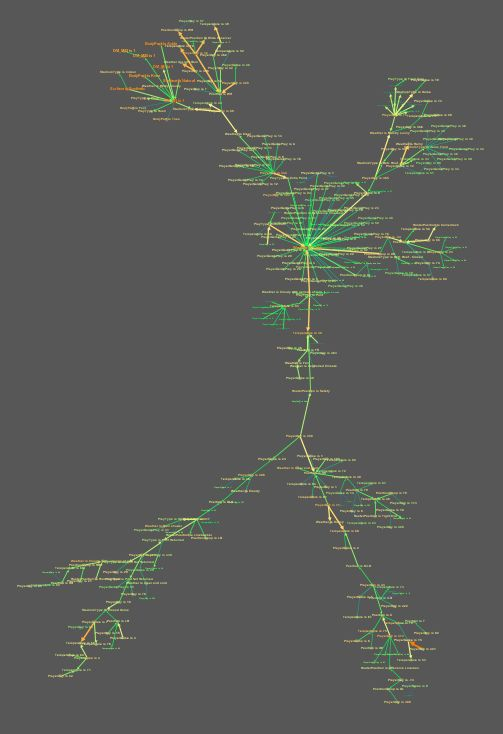
Fig. 7 - NetFL#3

One can see various red and orange parts of the "body" represented in Fig. 8. These are *causal conjunctions* of injury risks. We complete the presented work with a focus on some of these parts, leaving users free to explorate the whole results thanks to the supplied resources.


Zooming into the upper left of *NetFL#3*, we get Fig. 8.

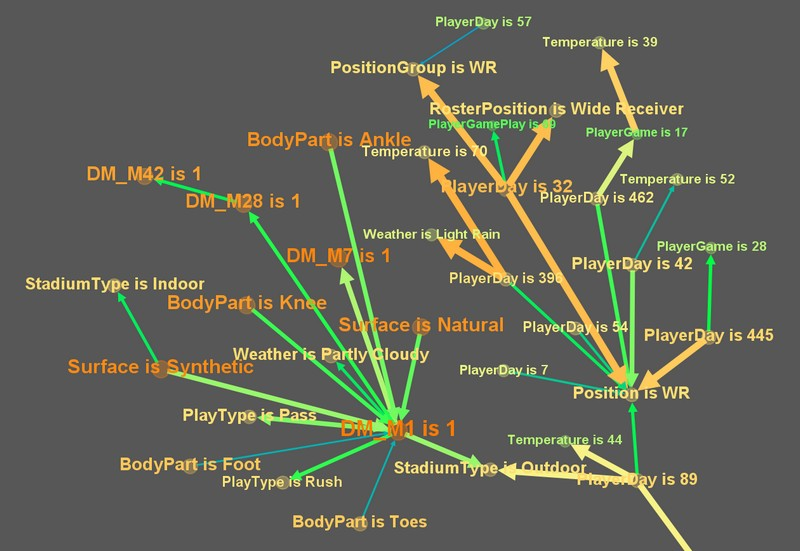
Fig. 8 - Upper left part of NetFL#3

Fig. 8 shows the causal chain from *1 day missed for injury* (*DM_M1 is 1*) to longer periods (DM_M28 and DM_M42). **It reminds team managers the importance of injury prevention** before *DM_M1*. 

*Synthetic surface* is tied to *Indoor stadium*, wich entails **Indoor game under high temperatures should be avoided in the beginning and in the end of league season**, as a synthesis of previous observations of injury causes. 

With the previously noticed position of *Linebacker*, the group and positions of *Wide Receiver* seem to be more exposed to injuries too. *PlayTypes Pass* and *Rush* are **combined factors to be avoided for these groups**, especially with high *PlayerDay* value (*396*) and *Light Rain* under medium *temperature* such as *70*° (likely Outdoor).

The exploration of NetFL#3 reveals a lot of other circumstances combinations raising the risk of injuries, such as *Playtype is Kickoff* when *Weather is Cold*, or *PlayerDay* is low (11) while *Weather is Sunny* and *Temperature is high* (89°).

A simple focus on the pair *Surface-BodyParts* makes appear the real (unbiased) distribution of injury risk. *Synthetic surface* is more dangerous for *Ankle* then for *Toes*, while *Natural* or *Synthetic* are equally dangerous for *Knee* and *Natural* is the worst for *Foot*. 

Anyway, *Heel*, *Toes* and *Foot* are not significantly injuried in comparison with *Ankle* and *Knee* (Fig. 9).

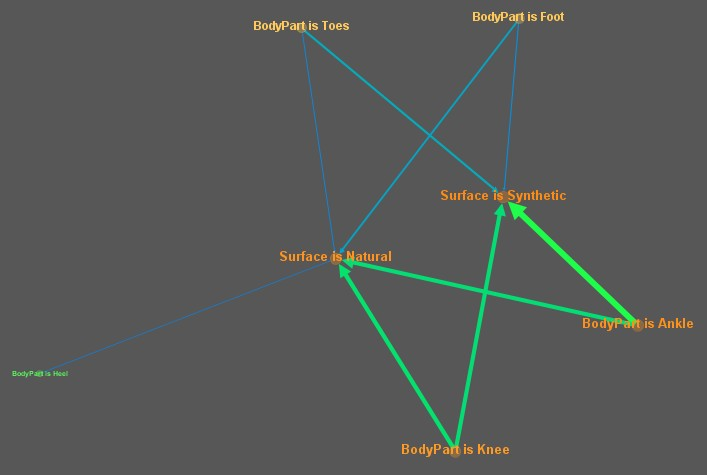
Fig. 9 - User defined paired data comparison

Similar analysis on movements (PlayerTrackData) having revealed no significant findings, no specific outcomes are presented. 

Thanks to the supplied resources, experts such as team managers and medical specialists can mine the computed PCNs so as to find circumstances, **to verify and prevent scenarios propitious to injury** and to foster better conditions for players and supporters. 

NDLA. The complete sources for reproducing these outcomes may be provided in case of award. 